In [6]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

La lecture des données par pandas ( des colonnes quoi )

In [7]:
df = pd.read_csv("Adrenaline.txt", delimiter="\t", header=0,
                 names=["Time", "BP", "Av BP", "HR", "D", "HR2"],
                 usecols=[0, 1, 2, 3, 4, 5],
                 decimal=",")
df.head() # cela donne la structure des colonnes lues

,Time,BP,Av BP,HR,D,HR2
0,125.905,60.18,59.4214,117.07,0.000015,117.0266
1,125.910,60.50,59.4214,117.07,0.000016,117.0266
2,125.915,61.20,59.4214,117.07,0.000016,117.0266
3,125.920,61.92,59.4214,117.07,0.000016,117.0266
4,125.925,62.37,59.4214,117.07,0.000015,117.0266


Visualisation des données ( frequence cardiaque en fonction du temps reel )

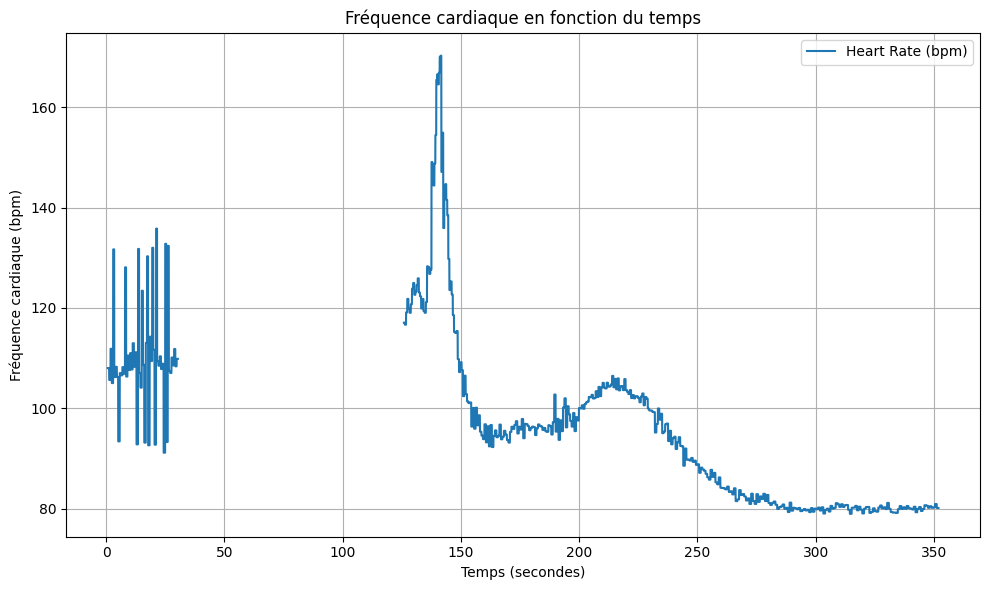

In [8]:
# Tracer HR en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['HR'], label='Heart Rate (bpm)')
plt.xlabel('Temps (secondes)')
plt.ylabel('Fréquence cardiaque (bpm)')
plt.title('Fréquence cardiaque en fonction du temps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analyse des signaux par neurokit sans lissage

In [9]:
# signal
signal = df["HR"].values

# extraction d'infos, 
# signals = signal obtenu, 
# info= plusieurs infos sur le signal comme les R picks

signals, info = nk.ecg_process(signal, sampling_rate=200)

# r-picks
rpeaks = info["ECG_R_Peaks"]



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\ecg\ecg_clean.py:106: NeuroKitWarning: There are 253 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\neurokit2\ecg\ecg_clean.py:165: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))


#representation des donnees obtenues


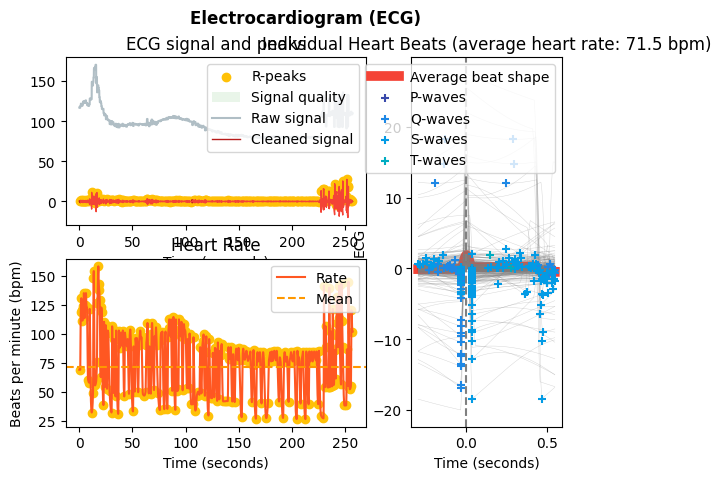

In [10]:
nk.ecg_plot(signals, info)
plt.show()

Lissage de mes couilles

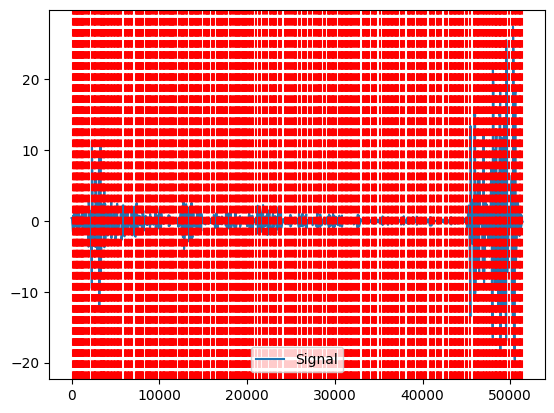

In [11]:
cleaned_ecg = signals["ECG_Clean"]
plot = nk.events_plot(rpeaks, cleaned_ecg)